In [7]:
# Miguel Angel Martinez Moncada 1945469 Practica 6 Data Classification
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Se lee el dataset preparado
df = pd.read_csv("Data Cleaning dataset-MAMM.csv")

# Se imprime el dataset
print(df)

      vendedor_1  vendedor_2   producto       fecha
0              5           5   CONSOLA9  05/05/2024
1              4           7   SMARTWAT  01/07/2012
2              4          11  CELULAA01  24/07/2010
3              5           9   AIRE2200  03/03/2016
4              5           4   SMARTWAT  30/06/2015
...          ...         ...        ...         ...
4995           2           8   LAPTOP15  21/05/2024
4996           4           6   LAPTOP15  19/08/2018
4997           7           6   CAMARAHD  02/05/2013
4998           6           4       TV42  10/07/2022
4999           3           9    DRONE99  30/09/2023

[5000 rows x 4 columns]


In [8]:
# Convertir fecha a número (número de días desde el inicio)
df['fecha_numerica'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y').map(pd.Timestamp.toordinal)

# Codificar producto (alfa-numérico) a número
label_encoder = LabelEncoder()
df['producto_cod'] = label_encoder.fit_transform(df['producto'])

# Variables predictoras y objetivo
X = df[['vendedor_1', 'producto_cod', 'fecha_numerica']]
y = df['vendedor_2']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Calcular RMSE y R²
# Un RMSE bajo es mejor (cero sería ideal).
#Significado general de R²
#0.7 Buena capacidad predictiva
#0.3 – 0.7 Moderada capacidad predictiva
#0.3 Baja capacidad predictiva
#0 o < 0 No útil: el modelo no explica los datos

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", round(rmse, 4))
print("R² Score:", round(r2, 4))

RMSE: 2.9227
R² Score: -0.2169


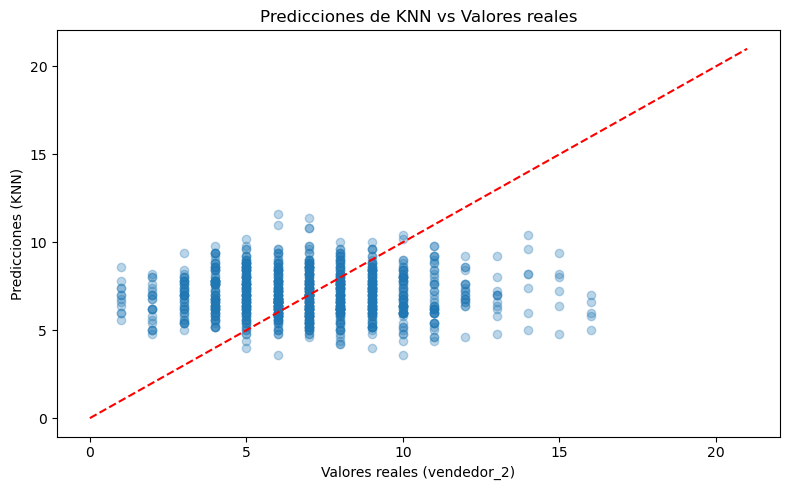

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valores reales (vendedor_2)")
plt.ylabel("Predicciones (KNN)")
plt.title("Predicciones de KNN vs Valores reales")
plt.tight_layout()
plt.show()

In [ ]:
#El modelo KNN no está funcionando bien en este caso, está prediciendo valores promedio, sin capturar los extremos ni las variaciones.